In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

In [3]:

X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X = pd.get_dummies(X, drop_first=True)
X = StandardScaler().fit_transform(X)

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7169 - loss: 0.5347 - val_accuracy: 0.7982 - val_loss: 0.4086
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7870 - loss: 0.4415 - val_accuracy: 0.8098 - val_loss: 0.4019
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8025 - loss: 0.4316 - val_accuracy: 0.8036 - val_loss: 0.4033
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8044 - loss: 0.4244 - val_accuracy: 0.8080 - val_loss: 0.3999
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7969 - loss: 0.4383 - val_accuracy: 0.8062 - val_loss: 0.4002
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8016 - loss: 0.4300 - val_accuracy: 0.8053 - val_loss: 0.4036
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7957 - loss: 0.4234 - val_accuracy: 0.8169 - val_loss: 0.4043
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8072 - loss: 0.4135 - val_accuracy: 0.

In [7]:

y_pred = model.predict(X_test).round()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



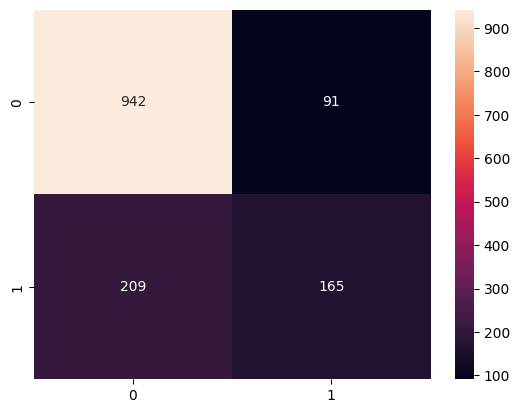

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


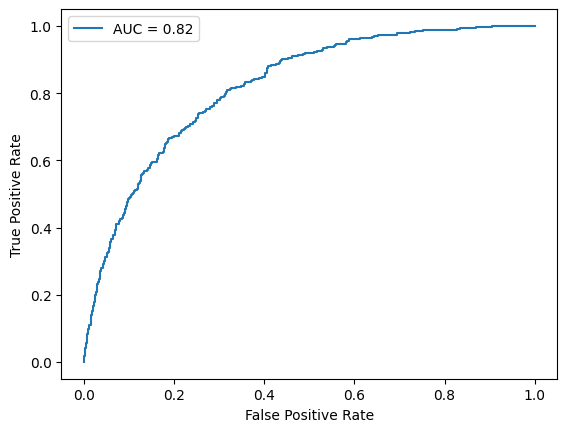

In [8]:

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [9]:

print("""
Analysis:
- Dropout reduces overfitting by randomly deactivating neurons during training.
- Precision/recall trade-off depends on business goals (e.g., minimize false positives).
""")


Analysis:
- Dropout reduces overfitting by randomly deactivating neurons during training.
- Precision/recall trade-off depends on business goals (e.g., minimize false positives).

